<a href="https://colab.research.google.com/github/VijayalakshmiRamasamy/DSrepo/blob/main/USA_ACCIDENT_DATA_Data_Visualization___Statistics_Matplotlib_%2C_Seaborn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pandas 
import pandas as pd

For this exercise, you will use United States Accidents data updated on Dec 20, 2020. It includes a record of each accident that took place from February 08 of 2016 to December 31 of 2020. 

In [ ]:
#Read the csv file as a data frame
df = pd.read_csv('/content/drive/MyDrive/Training-ML/US_Accidents_Dec20_updated.csv')

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# We construct a data frame called data that contains only the needed columns
data = df[['Severity', 'Start_Time', 'End_Time','Description', 'City', 'State', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']]

In [ ]:
# List the first 10 records
data.head(10)

Severity           Start_Time  ... Nautical_Twilight Astronomical_Twilight
0         3  2016-02-08 00:37:08  ...             Night                 Night
1         2  2016-02-08 05:56:20  ...             Night                 Night
2         2  2016-02-08 06:15:39  ...             Night                   Day
3         2  2016-02-08 06:15:39  ...             Night                   Day
4         2  2016-02-08 06:51:45  ...               Day                   Day
5         3  2016-02-08 07:53:43  ...               Day                   Day
6         2  2016-02-08 08:16:57  ...               Day                   Day
7         2  2016-02-08 08:16:57  ...               Day                   Day
8         2  2016-02-08 08:15:41  ...               Day                   Day
9         2  2016-02-08 11:51:46  ...               Day                   Day

[10 rows x 22 columns]

In [ ]:
data['Nautical_Twilight'].value_counts()

Day      1035103
Night     480878
Name: Nautical_Twilight, dtype: int64

In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Description', 'City', 'State',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**DATA FROM ONLY CA STATE**

In [ ]:
#Constrtuct another dataframe with all State's data except for California
data = data.loc[(data['State'] == 'WI')]
data.describe()

Severity
count  7919.000000
mean      2.830029
std       0.904175
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       4.000000

In [ ]:
data.to_csv('/content/drive/MyDrive/Training-ML/Kenoshs_Accidents_Dec20_updated.csv')

In [ ]:
# Display the number of accidents reported in each state
#Hint use value_counts() function
data['State'].sort_values(). value_counts()

WI    7919
Name: State, dtype: int64

In [ ]:
data['Nautical_Twilight'].sort_values(). value_counts()

Day      6442
Night    1477
Name: Nautical_Twilight, dtype: int64

In [ ]:
#Display the number of accidents that involves bumps and which did not.
def is_bump(x):
  return x == True
data['bumps'] = data['Bump'].apply(is_bump)
data['bumps'].value_counts()

False    7919
Name: bumps, dtype: int64

In [ ]:
#Display the number of accidents at sun_rise-sun_set
def is_evening(x):
  return x == True
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].apply(is_evening)
data['Sunrise_Sunset'].value_counts()

False    7919
Name: Sunrise_Sunset, dtype: int64

In [ ]:
#Display the number of accidents that involves crossings and which did not.
def is_crossing(x):
  return x == True
data['crossing'] = data['Crossing'].apply(is_crossing)
data['crossing'].value_counts()

False    7668
True      251
Name: crossing, dtype: int64

In [ ]:
def is_giveway(x):
  return x == True
data['giveway'] = data['Give_Way'].apply(is_giveway)
data['giveway'].value_counts()

False    7916
True        3
Name: giveway, dtype: int64

In [ ]:
# display the number of accidents that did not involve a bump
not_bump = data['Bump'].value_counts()[0] # first value of the result above
not_bump

1515803

In [ ]:
# display the number of accidents that involved a bump
bump = data['Bump'].value_counts()[1] # second value of the result above
bump

261

In [ ]:
total_acc = not_bump + bump # total count of accidents by bump
total_acc

1516064

In [ ]:
#print percentage of total accidents that involved bumps
print (bump / total_acc) # converting to float to get a float result

0.0001721563205774954


In [ ]:
#But this does not tell us how severity interacts with different types of accidents.
#To do that, we need to produce a cross-tabulation, or "cross-tab" for short. 
#(Statisticians tend to call this a contigency table or a two-way table.)
pd.crosstab(data["Severity"], data["Bump"])

Bump      False
Severity       
1            32
2          3928
3          1313
4          2646

In [ ]:
pd.crosstab(data["Severity"], data["Nautical_Twilight"])

Nautical_Twilight   Day  Night
Severity                      
1                    32      0
2                  3544    384
3                   987    326
4                  1879    767

In [ ]:
'''
cross-tabulation of two categorical variables is a two-dimensional array, 
with the levels of one variable along the rows and the levels of the other variable along the columns. 
Each cell in this array contains the number of observations that had a particular combination of levels. 
So in theaccident data set, there were acceidents of various severities (1-4) at many places. 
From the cross-tabulation, we can see that there were more accidents at crossings with severity 2 noticed.
'''
joint_accident_dn = pd.crosstab(data["Severity"], data["Nautical_Twilight"], 
                                    normalize=True)
joint_accident_dn

Nautical_Twilight       Day     Night
Severity                             
1                  0.004041  0.000000
2                  0.447531  0.048491
3                  0.124637  0.041167
4                  0.237277  0.096856

In [ ]:
'''
Marginal Distributions
Is it possible to know the distribution of severity alone from the joint distribution of day and night?
axis = 1 refers to columns
axis = 0 refers to rows
'''
marginal_dist_dn_sev = joint_accident_dn.sum(axis = 1)

marginal_dist_dn_sev

Severity
1    0.004041
2    0.496022
3    0.165804
4    0.334133
dtype: float64

In [ ]:
marginal_dist_dn = joint_accident_dn.sum(axis = 0)

marginal_dist_dn

Nautical_Twilight
Day      0.813487
Night    0.186513
dtype: float64

In [ ]:
'''
The name "marginal distribution" comes from the fact that it is customary to write 
these totals in the margins of the table. In fact pd.crosstab() has an argument margins= 
that automatically adds these margins to the cross-tabulation.
'''
pd.crosstab(data["Severity"], data["Nautical_Twilight"], 
            normalize=True, margins=True)

Nautical_Twilight       Day     Night       All
Severity                                       
1                  0.004041  0.000000  0.004041
2                  0.447531  0.048491  0.496022
3                  0.124637  0.041167  0.165804
4                  0.237277  0.096856  0.334133
All                0.813487  0.186513  1.000000

In [ ]:
# Now check this answer by calculating the distribution of Severity directly from the original data
data["Severity"].value_counts(normalize=True)

2    0.496022
4    0.334133
3    0.165804
1    0.004041
Name: Severity, dtype: float64

In [ ]:
cond_severity_dn = joint_accident_dn.divide(marginal_dist_dn, axis=1)
# In this case, joint_survived_gender / gender would also haved worked,
# but better to play it safe and be explicit about the axis.
cond_severity_dn 

Nautical_Twilight       Day     Night
Severity                             
1                  0.004967  0.000000
2                  0.550140  0.259986
3                  0.153213  0.220718
4                  0.291680  0.519296

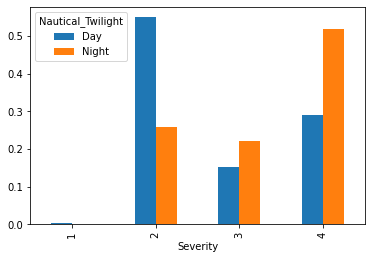

In [ ]:
cond_severity_dn.plot.bar()

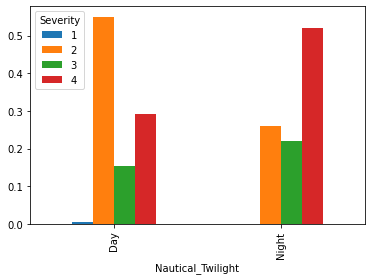

In [ ]:
cond_severity_dn.T.plot.bar()

In [ ]:
# Group the data based in the categorical variable State then by the Severity
group_by_state = data.groupby(['State','Severity'])

# Display the result
group_by_state.describe()

Start_Time                              ... giveway             
                    count unique                  top  ...  unique    top  freq
State Severity                                         ...                     
WI    1                32     31  2020-06-23 14:53:12  ...       1  False    32
      2              3928   3630  2016-10-14 16:24:12  ...       2  False  3925
      3              1313   1181  2018-10-30 22:12:42  ...       1  False  1313
      4              2646   1874  2020-03-26 15:11:45  ...       1  False  2646

[4 rows x 92 columns]

In [ ]:
#Disply the severity of accidents (number of accidents in each category) state-wise.
#Instead of averaging or summing, use .size() to count the number of rows in each grouping:
# Use unstack() method
group_by_state1 = group_by_state.size().unstack()
group_by_state1

Severity   1     2     3     4
State                         
WI        32  3928  1313  2646

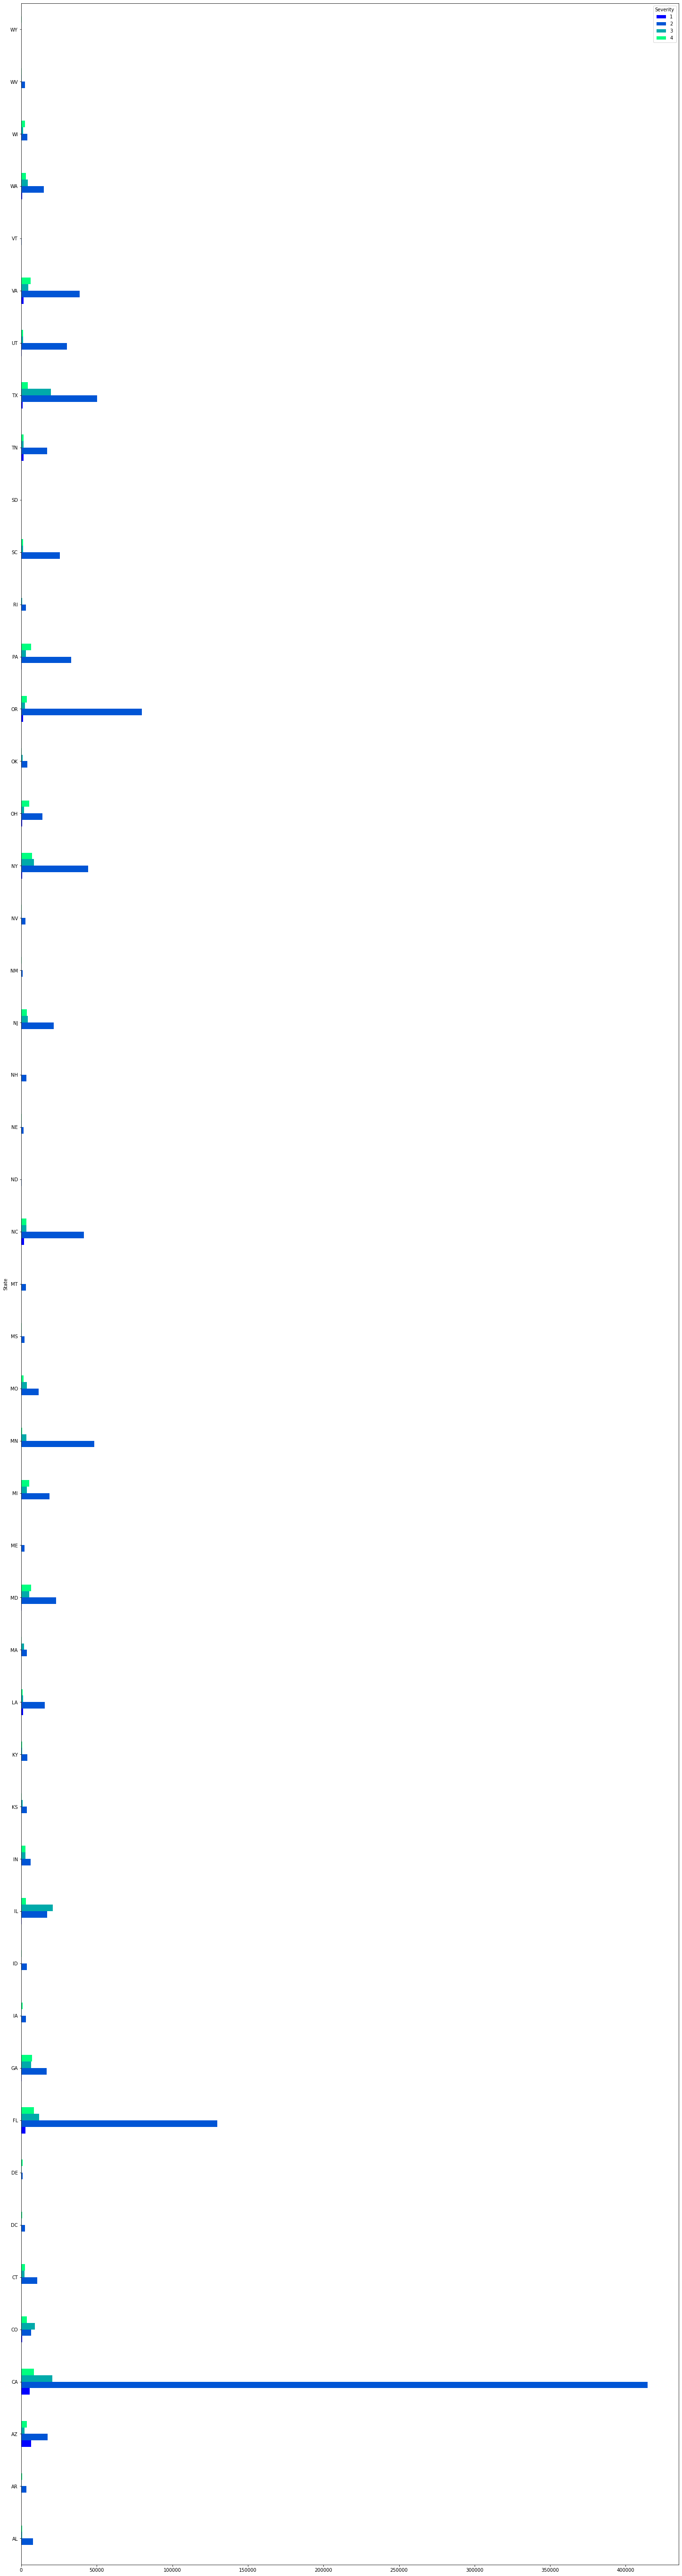

In [ ]:
# Create a bar plot to visualize the severity of accidents in all states
group_by_state1.plot(kind='barh', stacked=False, figsize=[25, 100], colormap='winter')

In [ ]:
# Create an area plot to visualize the severity of accidents in all states
group_by_state1.plot(kind='area', stacked=False, figsize=[25, 20], colormap='winter')

NameError: ignored

In [ ]:
# construct a pivot table for each state.
data.pivot_table(columns='State')

State                  WI
Bump             0.000000
Crossing         0.031696
Give_Way         0.000379
Junction         0.180957
No_Exit          0.003283
Railway          0.002778
Roundabout       0.000000
Severity         2.830029
Station          0.002526
Stop             0.008461
Sunrise_Sunset   0.000000
Traffic_Calming  0.000884
Traffic_Signal   0.050133
Turning_Loop     0.000000
bumps            0.000000
crossing         0.031696
giveway          0.000379

In [ ]:
data['Start_Time'] = data['Start_Time'].astype('datetime64[ns]')

In [ ]:
data['End_Time'] = data['End_Time'].astype('datetime64[ns]')

In [ ]:
from datetime import datetime

fmt = '%Y-%m-%d %H:%M:%S'
data['Start_Time'] = datetime.strptime(data.Start_Time.to_string(), fmt)
data['End_Time'] = datetime.strptime(data.End_Time.to_string, fmt)


In [ ]:
#How many accidents were longer than 20 hours?
import datetime as dt
type(data['Start_Time'])# - data['End_Time'])
daysDiff = (data['End_Time'] - data['Start_Time']).dt.days
# Convert days to hours
minutesDiff = daysDiff * 24



In [ ]:
data['longer_20'] = minutesDiff
data['longer_20'].unique()


array([   0,  288,  240,   48, 1848,   24])

In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Description', 'City', 'State',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'bumps', 'crossing', 'giveway', 'longer_20'],
      dtype='object')

In [ ]:
data['delay_200'] = data['longer_20'].apply(lambda x: x > 200)
delay = data['delay_200'].value_counts()
delay

False    7915
True        4
Name: delay_200, dtype: int64

In [ ]:
#Several columns in the dataset indicate the places of accidents.
# What were the most common types?
acc_list = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']
acc_type = data.pivot_table(index='Severity', values=acc_list, aggfunc=sum)
acc_type

Bump  Crossing  ...  Traffic_Signal  Turning_Loop
Severity                  ...                              
1            0         3  ...               5             0
2            0       127  ...             168             0
3            0        41  ...              90             0
4            0        80  ...             134             0

[4 rows x 13 columns]

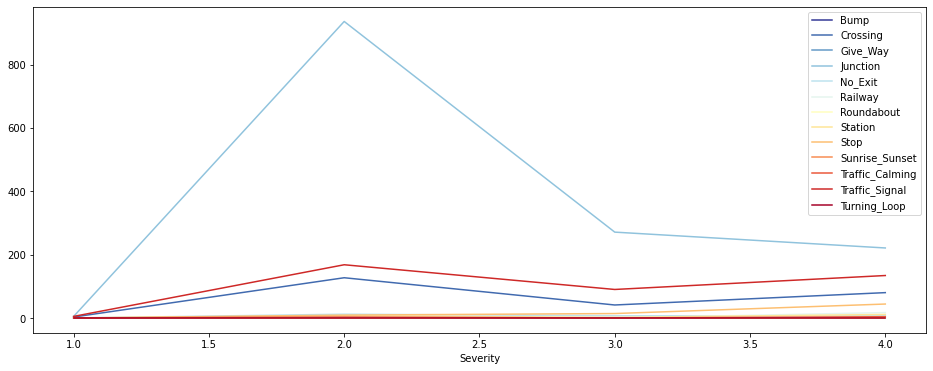

In [ ]:
acc_type.plot(kind='line', figsize=[16,6], stacked=False, colormap='RdYlBu_r') # area plot

In [ ]:
# Which severity contributes to most of the accidents?
acc_list = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']
acc_type1 = data.pivot_table(index='State', values=acc_list, aggfunc=sum)
acc_type1



Bump  Crossing  Give_Way  ...  Traffic_Calming  Traffic_Signal  Turning_Loop
State                            ...                                               
WI        0       251         3  ...                7             397             0

[1 rows x 13 columns]

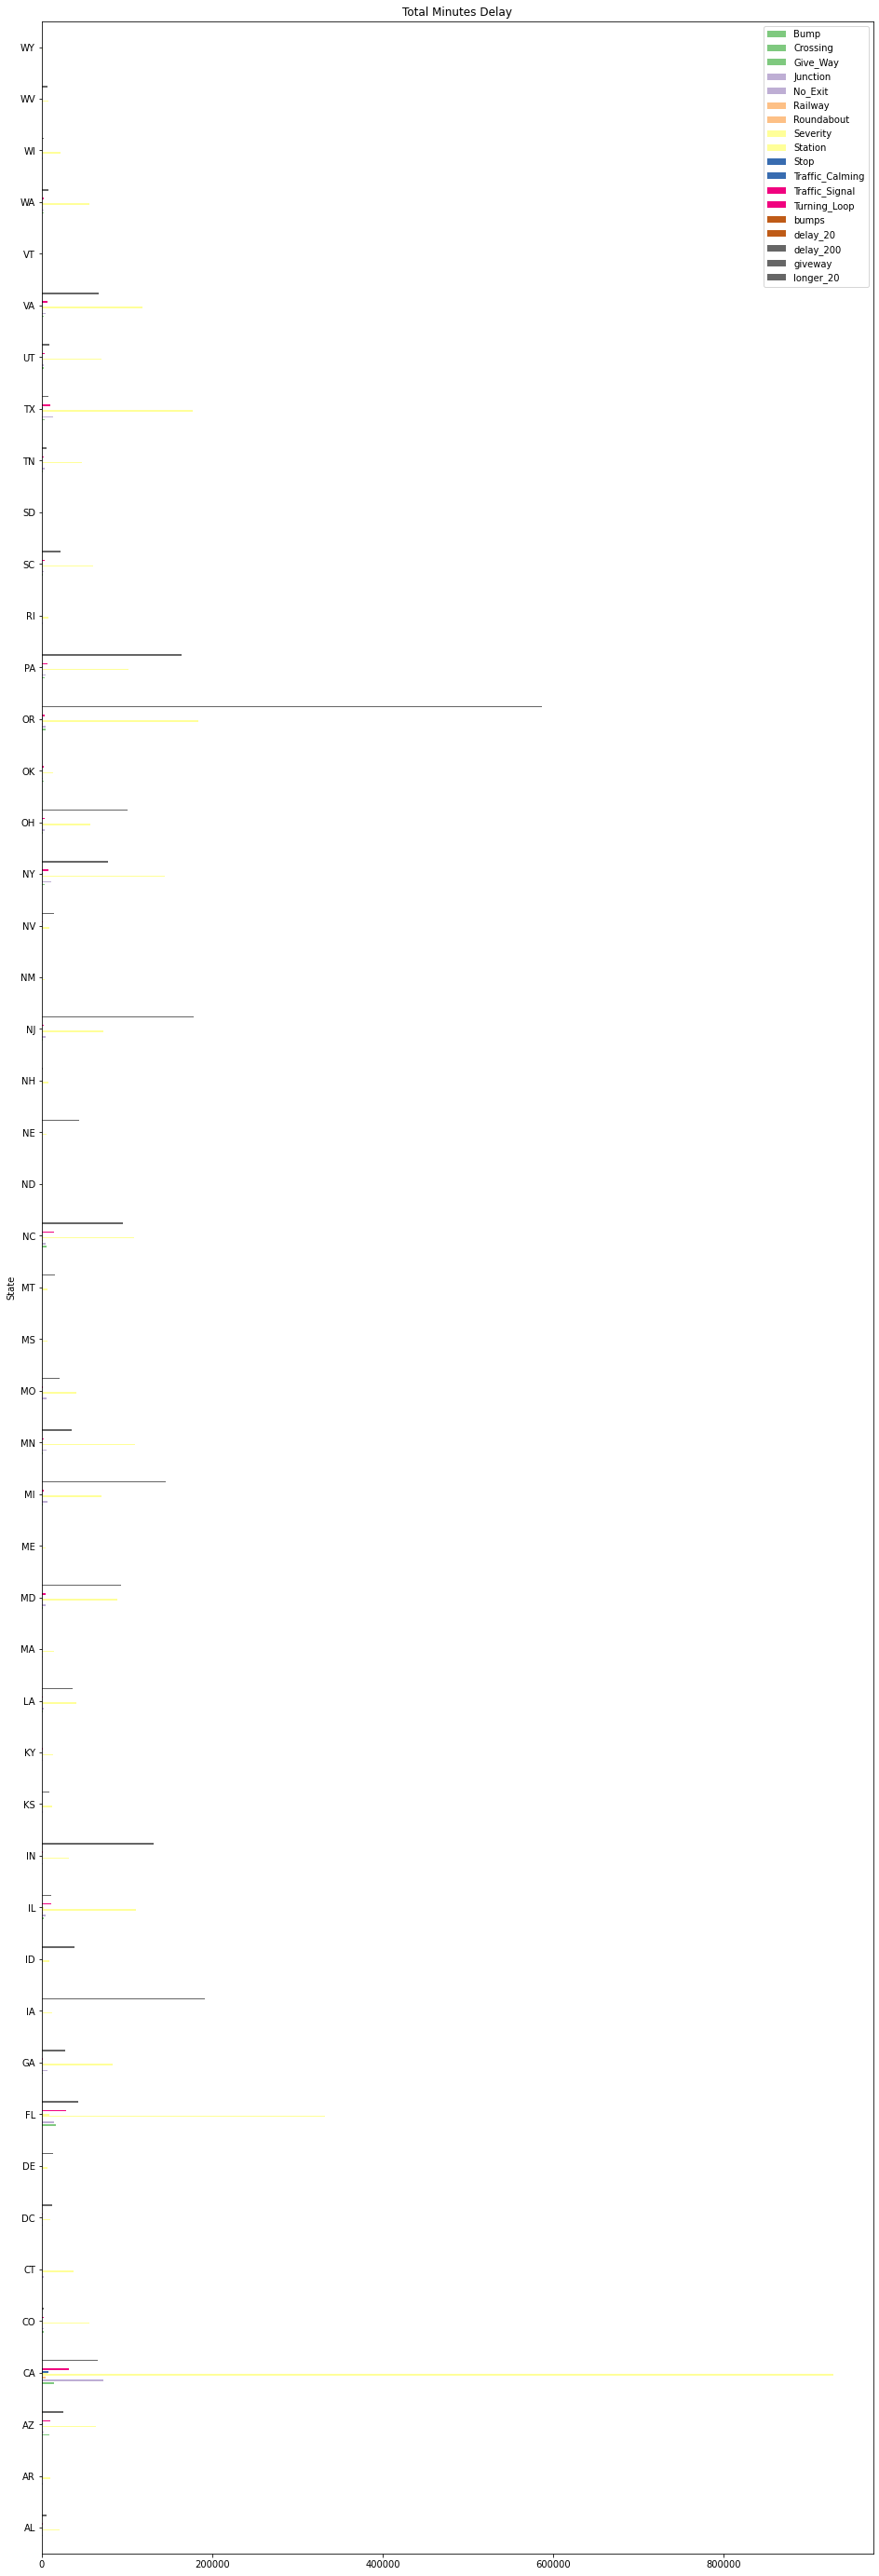

In [ ]:
most_acc.plot(kind='barh', figsize=[16,50], stacked=False, colormap='Accent', title='Total Minutes Delay')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data.head()

Severity          Start_Time  ... delay_20 delay_200
0         3 2016-02-08 00:37:08  ...    False     False
1         2 2016-02-08 05:56:20  ...    False     False
2         2 2016-02-08 06:15:39  ...    False     False
3         2 2016-02-08 06:15:39  ...    False     False
4         2 2016-02-08 06:51:45  ...    False     False

[5 rows x 27 columns]

In [ ]:
# Display the number of accidents repoted in each state
#Hint use value_counts() function
data['State'].sort_values(). value_counts()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

In [ ]:
severity_df = data.groupby(['State', 'Severity']).size().unstack().reset_index()
severity_df = severity_df.fillna(0)

In [ ]:
#Create total count column
severity_df.columns
severity_df['Severity_Count'] = (severity_df[1] + severity_df[2] + severity_df[3] + severity_df[4] ) 
severity_df

Severity State       1         2        3       4  Severity_Count
0           AL   114.0    7841.0    786.0   634.0          9375.0
1           AR    11.0    3402.0    302.0   658.0          4373.0
2           AZ  6695.0   17620.0   2229.0  3641.0         30185.0
3           CA  5544.0  414365.0  20603.0  8321.0        448833.0
4           CO   513.0    6416.0   9163.0  3717.0         19809.0
5           CT     5.0   10648.0   2150.0  2391.0         15194.0
6           DC    42.0    2617.0    428.0   701.0          3788.0
7           DE     7.0    1060.0    404.0   860.0          2331.0
8           FL  2939.0  129758.0  11744.0  8566.0        153007.0
9           GA   379.0   16841.0   6592.0  7299.0         31111.0
10          IA     3.0    3194.0    483.0  1100.0          4780.0
11          ID     0.0    3632.0    115.0   314.0          4061.0
12          IL   249.0   17299.0  20939.0  3222.0         41709.0
13          IN    42.0    6104.0   2768.0  2822.0         11736.0
14          KS     5.0    3713.0    998.0   430.0          5146.0
15          KY    33.0    4181.0    710.0   747.0          5671.0
16          LA  1238.0   15513.0   1394.0  1105.0         19250.0
17          MA   169.0    3747.0   1822.0   383.0          6121.0
18          MD   272.0   23105.0   5446.0  6497.0         35320.0
19          ME     0.0    2068.0     37.0    97.0          2202.0
20          MI    28.0   18655.0   3776.0  5316.0         27775.0
21          MN    30.0   48442.0   3382.0   491.0         52345.0
22          MO    62.0   11474.0   3852.0  1561.0         16949.0
23          MS     4.0    2235.0    261.0   290.0          2790.0
24          MT     0.0    3090.0    104.0   112.0          3306.0
25          NC  1778.0   41616.0   3296.0  3469.0         50159.0
26          ND     0.0     443.0      1.0    11.0           455.0
27          NE    26.0    1614.0    219.0   319.0          2178.0
28          NH     1.0    3539.0    115.0   171.0          3826.0
29          NJ    68.0   21592.0   4295.0  3895.0         29850.0
30          NM    47.0     913.0    138.0   369.0          1467.0
31          NV     1.0    2830.0    391.0   459.0          3681.0
32          NY   704.0   44361.0   8585.0  7324.0         60974.0
33          OH   512.0   14146.0   1980.0  5406.0         22044.0
34          OK    55.0    4188.0    947.0   402.0          5592.0
35          OR  1266.0   79841.0   2582.0  3795.0         87484.0
36          PA   182.0   33179.0   3002.0  6481.0         42844.0
37          RI    71.0    3027.0    559.0   109.0          3766.0
38          SC    64.0   25627.0   1198.0  1201.0         28090.0
39          SD     0.0     166.0      7.0    40.0           213.0
40          TN  1440.0   17240.0   1558.0  1636.0         21874.0
41          TX   942.0   50250.0  19677.0  4273.0         75142.0
42          UT   389.0   30197.0   1333.0  1299.0         33218.0
43          VA  1716.0   38716.0   4627.0  6139.0         51198.0
44          VT     0.0     282.0      9.0    61.0           352.0
45          WA   499.0   15095.0   4377.0  3028.0         22999.0
46          WI    32.0    3928.0   1313.0  2646.0          7919.0
47          WV     1.0    2470.0    307.0   464.0          3242.0
48          WY     0.0     102.0     48.0   180.0           330.0

In [ ]:
#Calculate the proportions
severity_df['Proportion_1']  = severity_df[1] /severity_df['Severity_Count']
severity_df['Proportion_1'] 
severity_df['Proportion_2']  = severity_df[2] /severity_df['Severity_Count']
severity_df['Proportion_2'] 
severity_df['Proportion_3']  = severity_df[3] /severity_df['Severity_Count']
severity_df['Proportion_3'] 
severity_df['Proportion_4']  = severity_df[4] /severity_df['Severity_Count']
severity_df['Proportion_4'] 

0     0.067627
1     0.150469
2     0.120623
3     0.018539
4     0.187642
5     0.157365
6     0.185058
7     0.368940
8     0.055984
9     0.234612
10    0.230126
11    0.077321
12    0.077250
13    0.240457
14    0.083560
15    0.131723
16    0.057403
17    0.062571
18    0.183947
19    0.044051
20    0.191395
21    0.009380
22    0.092100
23    0.103943
24    0.033878
25    0.069160
26    0.024176
27    0.146465
28    0.044694
29    0.130486
30    0.251534
31    0.124694
32    0.120117
33    0.245237
34    0.071888
35    0.043379
36    0.151270
37    0.028943
38    0.042755
39    0.187793
40    0.074792
41    0.056866
42    0.039105
43    0.119907
44    0.173295
45    0.131658
46    0.334133
47    0.143122
48    0.545455
Name: Proportion_4, dtype: float64

In [ ]:
severity_df

Severity State       1         2  ...  Proportion_2  Proportion_3  Proportion_4
0           AL   114.0    7841.0  ...      0.836373      0.083840      0.067627
1           AR    11.0    3402.0  ...      0.777956      0.069060      0.150469
2           AZ  6695.0   17620.0  ...      0.583734      0.073845      0.120623
3           CA  5544.0  414365.0  ...      0.923205      0.045903      0.018539
4           CO   513.0    6416.0  ...      0.323893      0.462568      0.187642
5           CT     5.0   10648.0  ...      0.700803      0.141503      0.157365
6           DC    42.0    2617.0  ...      0.690866      0.112988      0.185058
7           DE     7.0    1060.0  ...      0.454740      0.173316      0.368940
8           FL  2939.0  129758.0  ...      0.848053      0.076755      0.055984
9           GA   379.0   16841.0  ...      0.541320      0.211886      0.234612
10          IA     3.0    3194.0  ...      0.668201      0.101046      0.230126
11          ID     0.0    3632.0  ...      0.894361      0.028318      0.077321
12          IL   249.0   17299.0  ...      0.414755      0.502026      0.077250
13          IN    42.0    6104.0  ...      0.520109      0.235855      0.240457
14          KS     5.0    3713.0  ...      0.721531      0.193937      0.083560
15          KY    33.0    4181.0  ...      0.737260      0.125198      0.131723
16          LA  1238.0   15513.0  ...      0.805870      0.072416      0.057403
17          MA   169.0    3747.0  ...      0.612155      0.297664      0.062571
18          MD   272.0   23105.0  ...      0.654162      0.154190      0.183947
19          ME     0.0    2068.0  ...      0.939146      0.016803      0.044051
20          MI    28.0   18655.0  ...      0.671647      0.135950      0.191395
21          MN    30.0   48442.0  ...      0.925437      0.064610      0.009380
22          MO    62.0   11474.0  ...      0.676972      0.227270      0.092100
23          MS     4.0    2235.0  ...      0.801075      0.093548      0.103943
24          MT     0.0    3090.0  ...      0.934664      0.031458      0.033878
25          NC  1778.0   41616.0  ...      0.829682      0.065711      0.069160
26          ND     0.0     443.0  ...      0.973626      0.002198      0.024176
27          NE    26.0    1614.0  ...      0.741047      0.100551      0.146465
28          NH     1.0    3539.0  ...      0.924987      0.030058      0.044694
29          NJ    68.0   21592.0  ...      0.723350      0.143886      0.130486
30          NM    47.0     913.0  ...      0.622359      0.094070      0.251534
31          NV     1.0    2830.0  ...      0.768813      0.106221      0.124694
32          NY   704.0   44361.0  ...      0.727540      0.140798      0.120117
33          OH   512.0   14146.0  ...      0.641717      0.089820      0.245237
34          OK    55.0    4188.0  ...      0.748927      0.169349      0.071888
35          OR  1266.0   79841.0  ...      0.912635      0.029514      0.043379
36          PA   182.0   33179.0  ...      0.774414      0.070068      0.151270
37          RI    71.0    3027.0  ...      0.803771      0.148433      0.028943
38          SC    64.0   25627.0  ...      0.912318      0.042649      0.042755
39          SD     0.0     166.0  ...      0.779343      0.032864      0.187793
40          TN  1440.0   17240.0  ...      0.788150      0.071226      0.074792
41          TX   942.0   50250.0  ...      0.668734      0.261864      0.056866
42          UT   389.0   30197.0  ...      0.909055      0.040129      0.039105
43          VA  1716.0   38716.0  ...      0.756201      0.090375      0.119907
44          VT     0.0     282.0  ...      0.801136      0.025568      0.173295
45          WA   499.0   15095.0  ...      0.656333      0.190313      0.131658
46          WI    32.0    3928.0  ...      0.496022      0.165804      0.334133
47          WV     1.0    2470.0  ...      0.761875      0.094695      0.143122
48          WY     0.0     102.0  ...      0.309091      0.145455      0.545455


In [ ]:
#sort
severity_df.sort_values('Severity_Count', ascending=False)

Severity State       1         2  ...  Proportion_2  Proportion_3  Proportion_4
3           CA  5544.0  414365.0  ...      0.923205      0.045903      0.018539
8           FL  2939.0  129758.0  ...      0.848053      0.076755      0.055984
35          OR  1266.0   79841.0  ...      0.912635      0.029514      0.043379
41          TX   942.0   50250.0  ...      0.668734      0.261864      0.056866
32          NY   704.0   44361.0  ...      0.727540      0.140798      0.120117
21          MN    30.0   48442.0  ...      0.925437      0.064610      0.009380
43          VA  1716.0   38716.0  ...      0.756201      0.090375      0.119907
25          NC  1778.0   41616.0  ...      0.829682      0.065711      0.069160
36          PA   182.0   33179.0  ...      0.774414      0.070068      0.151270
12          IL   249.0   17299.0  ...      0.414755      0.502026      0.077250
18          MD   272.0   23105.0  ...      0.654162      0.154190      0.183947
42          UT   389.0   30197.0  ...      0.909055      0.040129      0.039105
9           GA   379.0   16841.0  ...      0.541320      0.211886      0.234612
2           AZ  6695.0   17620.0  ...      0.583734      0.073845      0.120623
29          NJ    68.0   21592.0  ...      0.723350      0.143886      0.130486
38          SC    64.0   25627.0  ...      0.912318      0.042649      0.042755
20          MI    28.0   18655.0  ...      0.671647      0.135950      0.191395
45          WA   499.0   15095.0  ...      0.656333      0.190313      0.131658
33          OH   512.0   14146.0  ...      0.641717      0.089820      0.245237
40          TN  1440.0   17240.0  ...      0.788150      0.071226      0.074792
4           CO   513.0    6416.0  ...      0.323893      0.462568      0.187642
16          LA  1238.0   15513.0  ...      0.805870      0.072416      0.057403
22          MO    62.0   11474.0  ...      0.676972      0.227270      0.092100
5           CT     5.0   10648.0  ...      0.700803      0.141503      0.157365
13          IN    42.0    6104.0  ...      0.520109      0.235855      0.240457
0           AL   114.0    7841.0  ...      0.836373      0.083840      0.067627
46          WI    32.0    3928.0  ...      0.496022      0.165804      0.334133
17          MA   169.0    3747.0  ...      0.612155      0.297664      0.062571
15          KY    33.0    4181.0  ...      0.737260      0.125198      0.131723
34          OK    55.0    4188.0  ...      0.748927      0.169349      0.071888
14          KS     5.0    3713.0  ...      0.721531      0.193937      0.083560
10          IA     3.0    3194.0  ...      0.668201      0.101046      0.230126
1           AR    11.0    3402.0  ...      0.777956      0.069060      0.150469
11          ID     0.0    3632.0  ...      0.894361      0.028318      0.077321
28          NH     1.0    3539.0  ...      0.924987      0.030058      0.044694
6           DC    42.0    2617.0  ...      0.690866      0.112988      0.185058
37          RI    71.0    3027.0  ...      0.803771      0.148433      0.028943
31          NV     1.0    2830.0  ...      0.768813      0.106221      0.124694
24          MT     0.0    3090.0  ...      0.934664      0.031458      0.033878
47          WV     1.0    2470.0  ...      0.761875      0.094695      0.143122
23          MS     4.0    2235.0  ...      0.801075      0.093548      0.103943
7           DE     7.0    1060.0  ...      0.454740      0.173316      0.368940
19          ME     0.0    2068.0  ...      0.939146      0.016803      0.044051
27          NE    26.0    1614.0  ...      0.741047      0.100551      0.146465
30          NM    47.0     913.0  ...      0.622359      0.094070      0.251534
26          ND     0.0     443.0  ...      0.973626      0.002198      0.024176
44          VT     0.0     282.0  ...      0.801136      0.025568      0.173295
48          WY     0.0     102.0  ...      0.309091      0.145455      0.545455
39          SD     0.0     166.0  ...      0.779343      0.032864      0.187793


In [ ]:
severity_df.columns

Index([         'State',                1,                2,                3,
                      4, 'Severity_Count',   'Proportion_1',   'Proportion_2',
         'Proportion_3',   'Proportion_4'],
      dtype='object', name='Severity')

In [ ]:
#Basic statistics: mean, median, percentiles

acc_list = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']
severity_df['mean'] = (severity_df[1] + severity_df[2] + severity_df[3] + severity_df[4] ) /4
severity_df

##acc_mean = data.pivot_table(columns='Severity',index='State', values=acc_list, aggfunc=np.mean)
##acc_mean


Severity State       1         2  ...  Proportion_3  Proportion_4       mean
0           AL   114.0    7841.0  ...      0.083840      0.067627    2343.75
1           AR    11.0    3402.0  ...      0.069060      0.150469    1093.25
2           AZ  6695.0   17620.0  ...      0.073845      0.120623    7546.25
3           CA  5544.0  414365.0  ...      0.045903      0.018539  112208.25
4           CO   513.0    6416.0  ...      0.462568      0.187642    4952.25
5           CT     5.0   10648.0  ...      0.141503      0.157365    3798.50
6           DC    42.0    2617.0  ...      0.112988      0.185058     947.00
7           DE     7.0    1060.0  ...      0.173316      0.368940     582.75
8           FL  2939.0  129758.0  ...      0.076755      0.055984   38251.75
9           GA   379.0   16841.0  ...      0.211886      0.234612    7777.75
10          IA     3.0    3194.0  ...      0.101046      0.230126    1195.00
11          ID     0.0    3632.0  ...      0.028318      0.077321    1015.25
12          IL   249.0   17299.0  ...      0.502026      0.077250   10427.25
13          IN    42.0    6104.0  ...      0.235855      0.240457    2934.00
14          KS     5.0    3713.0  ...      0.193937      0.083560    1286.50
15          KY    33.0    4181.0  ...      0.125198      0.131723    1417.75
16          LA  1238.0   15513.0  ...      0.072416      0.057403    4812.50
17          MA   169.0    3747.0  ...      0.297664      0.062571    1530.25
18          MD   272.0   23105.0  ...      0.154190      0.183947    8830.00
19          ME     0.0    2068.0  ...      0.016803      0.044051     550.50
20          MI    28.0   18655.0  ...      0.135950      0.191395    6943.75
21          MN    30.0   48442.0  ...      0.064610      0.009380   13086.25
22          MO    62.0   11474.0  ...      0.227270      0.092100    4237.25
23          MS     4.0    2235.0  ...      0.093548      0.103943     697.50
24          MT     0.0    3090.0  ...      0.031458      0.033878     826.50
25          NC  1778.0   41616.0  ...      0.065711      0.069160   12539.75
26          ND     0.0     443.0  ...      0.002198      0.024176     113.75
27          NE    26.0    1614.0  ...      0.100551      0.146465     544.50
28          NH     1.0    3539.0  ...      0.030058      0.044694     956.50
29          NJ    68.0   21592.0  ...      0.143886      0.130486    7462.50
30          NM    47.0     913.0  ...      0.094070      0.251534     366.75
31          NV     1.0    2830.0  ...      0.106221      0.124694     920.25
32          NY   704.0   44361.0  ...      0.140798      0.120117   15243.50
33          OH   512.0   14146.0  ...      0.089820      0.245237    5511.00
34          OK    55.0    4188.0  ...      0.169349      0.071888    1398.00
35          OR  1266.0   79841.0  ...      0.029514      0.043379   21871.00
36          PA   182.0   33179.0  ...      0.070068      0.151270   10711.00
37          RI    71.0    3027.0  ...      0.148433      0.028943     941.50
38          SC    64.0   25627.0  ...      0.042649      0.042755    7022.50
39          SD     0.0     166.0  ...      0.032864      0.187793      53.25
40          TN  1440.0   17240.0  ...      0.071226      0.074792    5468.50
41          TX   942.0   50250.0  ...      0.261864      0.056866   18785.50
42          UT   389.0   30197.0  ...      0.040129      0.039105    8304.50
43          VA  1716.0   38716.0  ...      0.090375      0.119907   12799.50
44          VT     0.0     282.0  ...      0.025568      0.173295      88.00
45          WA   499.0   15095.0  ...      0.190313      0.131658    5749.75
46          WI    32.0    3928.0  ...      0.165804      0.334133    1979.75
47          WV     1.0    2470.0  ...      0.094695      0.143122     810.50
48          WY     0.0     102.0  ...      0.145455      0.545455      82.50

[49 rows x 11 columns]

In [ ]:
severity_df.describe()

Severity            1              2  ...  Proportion_4           mean
count       49.000000      49.000000  ...     49.000000      49.000000
mean       575.061224   24742.489796  ...      0.131977    7735.020408
std       1307.044669   61479.052740  ...      0.101364   16788.310841
min          0.000000     102.000000  ...      0.009380      53.250000
25%          5.000000    3027.000000  ...      0.057403     941.500000
50%         55.000000    6416.000000  ...      0.120117    2934.000000
75%        499.000000   21592.000000  ...      0.183947    7777.750000
max       6695.000000  414365.000000  ...      0.545455  112208.250000

[8 rows x 10 columns]

In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Description', 'City', 'State',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'bumps', 'giveway', 'longer_20', 'delay_20',
       'delay_200'],
      dtype='object')

In [ ]:
data['Bump'].describe()

count     1516064
unique          2
top         False
freq      1515803
Name: Bump, dtype: object

In [ ]:
data[data['Bump']].describe()

Severity  longer_20
count  261.000000      261.0
mean     2.126437        0.0
std      0.529251        0.0
min      1.000000        0.0
25%      2.000000        0.0
50%      2.000000        0.0
75%      2.000000        0.0
max      4.000000        0.0

In [ ]:
df1 = df1.loc[(df['Start_Time'] > '2020-01-01 00:00:00') & (df['State']=='CA')]

In [ ]:
df1['State'].value_counts()

CA    234887
Name: State, dtype: int64


Severity
Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.

Start_Time
Shows start time of the accident in local time zone.

End_Time
Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat
Shows latitude in GPS coordinate of the start point.

Start_Lng
Shows longitude in GPS coordinate of the start point.

End_Lat
Shows latitude in GPS coordinate of the end point.

End_Lng
Shows longitude in GPS coordinate of the end point.

Distance(mi)
The length of the road extent affected by the accident.

Description
Shows natural language description of the accident.

In [ ]:
min(df1['Start_Time']),max(df1['Start_Time'])

('2020-01-01 00:01:00', '2020-12-31 22:40:00')

In [ ]:
#Q2.2 Display a geographical scatterplot of the data 
#Make the map
import plotly.graph_objects as go #Added this for the map graph
geo_scat_plot = go.Figure(data=go.Scattergeo( lon=df1['Start_Lng'], lat=df1['Start_Lat'], mode ='markers', marker_color = 'red'))

#Populate the map
geo_scat_plot.update_layout(
    title = 'Accident Locations',geo_scope = 'usa'
    )

#Show the map
geo_scat_plot.show()

In [ ]:
df1 = df[['Severity', 'Start_Time', 'End_Time','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']]

In [ ]:
df1.head()

Severity           Start_Time  ... Nautical_Twilight  Astronomical_Twilight
0         3  2016-02-08 00:37:08  ...             Night                  Night
1         2  2016-02-08 05:56:20  ...             Night                  Night
2         2  2016-02-08 06:15:39  ...             Night                    Day
3         2  2016-02-08 06:15:39  ...             Night                    Day
4         2  2016-02-08 06:51:45  ...               Day                    Day

[5 rows x 28 columns]

In [ ]:
df1.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Temperature(F)            43033
Wind_Chill(F)            449316
Humidity(%)               45509
Pressure(in)              36274
Visibility(mi)            44211
Wind_Direction            41858
Wind_Speed(mph)          128862
Precipitation(in)        510549
Weather_Condition         44007
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Sunrise_Sunset               83
Civil_Twilight               83
Nautical_Twilight            83
Astronomical_Twilight        83
dtype: int64

In [ ]:
df1 = df[['Severity', 'Start_Time', 'End_Time','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']]

In [ ]:
dbump = df[df['Bump'] == True]
bump.value_counts

<bound method DataFrame.value_counts of                 ID  Severity  ... Nautical_Twilight Astronomical_Twilight
3435     A-2720035         2  ...               Day                   Day
103995   A-2820595         2  ...               Day                   Day
105168   A-2821768         2  ...               Day                   Day
139571   A-2856171         2  ...               Day                   Day
241747   A-2958420         2  ...             Night                 Night
...            ...       ...  ...               ...                   ...
1500789  A-4224132         2  ...               Day                   Day
1500790  A-4224133         2  ...               Day                   Day
1503618  A-4226961         4  ...               Day                   Day
1514497  A-4237840         2  ...               Day                   Day
1515045  A-4238388         3  ...               Day                   Day

[261 rows x 47 columns]>

  Accident Date/Time Accident State  ... Net Loss (Barrels) All Costs
0   1/1/2010 7:15 AM             KS  ...               21.0      1627
1   1/4/2010 8:30 AM             ME  ...                0.0      4008
2  1/5/2010 10:30 AM             LA  ...                2.0       200
3   1/6/2010 7:30 PM             WI  ...                0.0     11540
4   1/7/2010 1:00 PM             TX  ...                2.0     29650

[5 rows x 6 columns]


Net Loss (Barrels)     All Costs
count         2795.000000  2.795000e+03
mean           132.194050  8.340332e+05
std           1185.019252  1.657830e+07
min              0.000000  0.000000e+00
25%              0.000000  5.039500e+03
50%              0.000000  2.312900e+04
75%              2.000000  1.172325e+05
max          30565.000000  8.405261e+08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



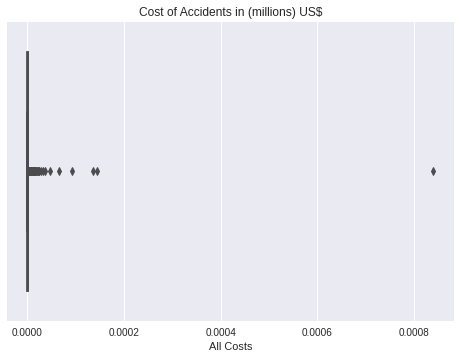

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



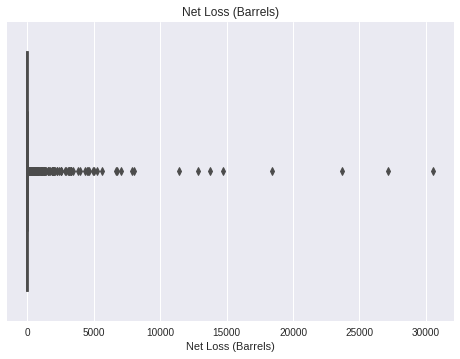

In [ ]:
import numpy as np
data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])
totaltimespan = np.max(data['Accident Date/Time']) - np.min(data['Accident Date/Time'])

totaltime_hour = (totaltimespan.days*24 + totaltimespan.seconds/(3600))
totaltime_month = (totaltimespan.days + totaltimespan.seconds/(3600*24)) *12/365

lmda_h = len(data) / totaltime_hour
lmda_m = len(data) / totaltime_month 

print('Estimated no. of accidents per hour: {}'.format(lmda_h)) 
print('Estimated no. of accidents per month: {}'.format(lmda_m))

#Estimated no. of accidents per hour: 0.04540255169379675
#Estimated no. of accidents per month: 33.14386273647162

Estimated no. of accidents per hour: 0.04540255169379675
Estimated no. of accidents per month: 33.14386273647162


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
# basics graphs - bar, line, histogram, pie, scatter
import matplotlib.pyplot as plt
# descriptive plot - relation b/w , pairplot, density
import seaborn as sns
import numpy as np

In [ ]:
# Reading Dataset
boston_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/boston_train.csv')
boston_df.head()

In [ ]:
boston_df.shape

**Line Plot**

* Used for univariate data analysis (Continious)

In [ ]:
plt.figure(figsize = (20,9))
plt.plot(boston_df['AGE'])
plt.title('Line Plot', fontsize = 14)
plt.xlabel("Row Indexes")
plt.ylabel("AGE")
plt.show()

In [ ]:
# All unique values in ascending order
boston_df['AGE'].sort_values().unique()

In [ ]:
# Drop Duplicates
boston_df['AGE'].drop_duplicates()

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(boston_df['AGE'].sort_values().unique(), color = 'orangered')
plt.title('Line Plot', fontsize = 14)
plt.xlabel("Row Indexes")
plt.ylabel("AGE")
plt.show()

### BAR Plot
* Bivariate/Univariate Analysis
* Discete / Categorical values vs. Continious

In [ ]:
plt.figure(figsize = (14,9))
plt.bar(x = boston_df['ZN'], height = boston_df['MEDV'], width = 1.5, color = 'turquoise')
plt.xlabel("ZN")
plt.ylabel("Max of MEDV")
plt.show()

**Histogram Plots**
* Frquency Distribution (Variance in Distribution)
* Univariate Analysis - Range of data vs Frequency

In [ ]:
'''
Histogram represents Frequency of groups of Data, Distribution or sread of continious data
[4, 5, 6, 11, 15, 19, 21, 29, 33, 34, 41, 52, 53, 56, 60, 70] , bins = 7
1-10 : 3
11-20 : 3
21-30 : 2
31-40 : 2
41-50 : 1
'''

In [ ]:
plt.figure(figsize = (14,9))
pl t.hist(x = boston_df['MEDV'], color = 'purple', bins = 20)
plt.title("Histogram Plot", fontsize = 14)
plt.xlabel("MEDV")
plt.ylabel("Frequency (in Range)")
plt.savefig('/content/histogram.png')
plt.show()

### Scatter Plot
* Relation b/w variables (Bivariate Analysis)

In [ ]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/iris.csv', sep = ',')

iris_df

In [ ]:
iris_df['species'].unique()

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x = iris_df['sepal_length'], y = iris_df['petal_length'])
plt.title("Scatter Plot", fontsize = 14)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (12,8))
plt.scatter(x = iris_df['sepal_length'], y = iris_df['petal_length'], label = 'Petal Width')
plt.scatter(x = iris_df['sepal_length'], y = iris_df['sepal_width'], label = 'Sepal Width')
plt.title("Scatter Plot", fontsize = 14)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

**Scatterplot using Seaborn**

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot( x = 'sepal_length', y = 'petal_length', data = iris_df, hue = 'species', s = 40)
plt.show()

**Pie Chart**

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(iris_df['species'].value_counts(), autopct='%0.1f%%', explode = (0, 0, 0.2), labels = ['setosa','versicolor','virginica'])
plt.show()

### Distributional Plot
* Density plot and Histogram Plot

In [ ]:
plt.figure(figsize = (11,8))
sns.distplot(boston_df['MEDV'], color = 'darkviolet')
plt.show()

In [ ]:
boston_df['MEDV'].mean() 

In [ ]:
boston_df['MEDV'].median() 

In [ ]:
plt.figure(figsize = (11,8))
sns.distplot(boston_df['MEDV'], color = 'k', hist= False)
plt.axvline(x = boston_df['MEDV'].median(), color = 'b', linestyle = '--')
plt.axvline(x = boston_df['MEDV'].mean(), color = 'r', linestyle = '--')
plt.show()

**Boxplot**

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(data = iris_df)

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(data = iris_df, orient = 'h', palette='plasma')

**Correlation**

In [ ]:
# Correlation will have range b/w -1 to +1
boston_df.corr(method = 'pearson')

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(boston_df.corr(), cmap = 'RdPu', annot = True)

In [ ]:
# if corr b/w two continious data is closer to zero = There is no or weak relation b/w both 
# if corr b/w two continious data is closer to +1 (>0.85)= Its positive relation b/w both (Directly Proportional)
# if corr b/w two continious data is closer to -1(<-0.85) = Its negative relation b/w both (Inversly Proportional)